In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#设置画图时的文字根式为微软雅黑， 显示中文字体
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.style.use("ggplot")

%matplotlib inline

# 数据探索

In [6]:
data = pd.read_csv('../../data/titanic/train.csv')
# print(data)
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [196]:
data['Cabin'].isnull().sum()

687

PassengerId:乘客ID

Survived:是否获救

Pclass:乘客等级

Name:乘客姓名

Sex:性别

Age:年龄

SibSp:堂兄弟妹个数

Parch:父母与小孩个数

Ticket:船票信息

Fare:票价

Cabin:客舱

Embarked:登船港口


# 可视化

Text(0.5,1,'Passegers per boarding location')

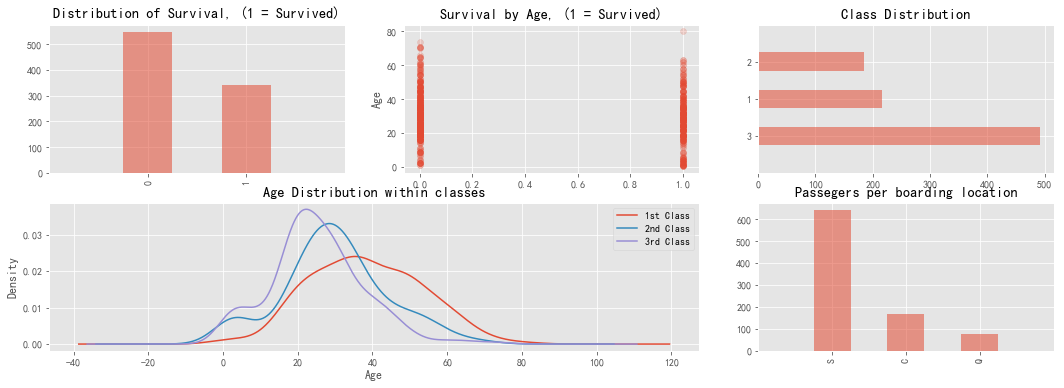

In [197]:
fig = plt.figure(figsize=(18, 6))
alpha = alpha_scatterplot = 0.2
alpha_bar_chart = 0.55

ax1 = plt.subplot2grid((2, 3), (0, 0))
# plt.subplot(231)
data.Survived.value_counts().plot(kind = 'bar', alpha=alpha_bar_chart)
ax1.set_xlim(-1, 2)
plt.title("Distribution of Survival, (1 = Survived)")

plt.subplot2grid((2, 3), (0, 1))
plt.scatter(data.Survived, data.Age, alpha=alpha_scatterplot)
plt.ylabel("Age")
plt.grid(b=True, which="major", axis='y')
plt.title("Survival by Age, (1 = Survived)")

ax3 = plt.subplot2grid((2, 3), (0, 2))
data.Pclass.value_counts().plot(kind = 'barh', alpha=alpha_bar_chart)
ax3.set_ylim(-1, len(data.Pclass.value_counts()))
plt.title("Class Distribution")

plt.subplot2grid((2, 3), (1, 0), colspan=2)
data.Age[data.Pclass == 1].plot(kind='kde')
data.Age[data.Pclass == 2].plot(kind='kde')
data.Age[data.Pclass == 3].plot(kind='kde')
plt.xlabel("Age")
plt.title("Age Distribution within classes")
plt.legend(('1st Class', '2nd Class', '3rd Class'), loc='best')

ax5 = plt.subplot2grid((2, 3), (1, 2))
data.Embarked.value_counts().plot(kind='bar', alpha=alpha_bar_chart)
ax5.set_xlim(-1, len(data.Embarked.value_counts()))
plt.title("Passegers per boarding location")

# 生还情况

Text(0.5,1,'Survival Breakdown (1 = Survived, 0 = Died)')

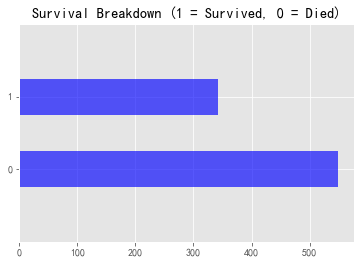

In [198]:
plt.figure(figsize=(6, 4))
fig, ax = plt.subplots()
data.Survived.value_counts().plot(kind='barh', color='blue', alpha=.65)
ax.set_ylim(-1, len(data.Survived.value_counts()))
plt.title("Survival Breakdown (1 = Survived, 0 = Died)")

# 与性别有关？

(-1, 2)

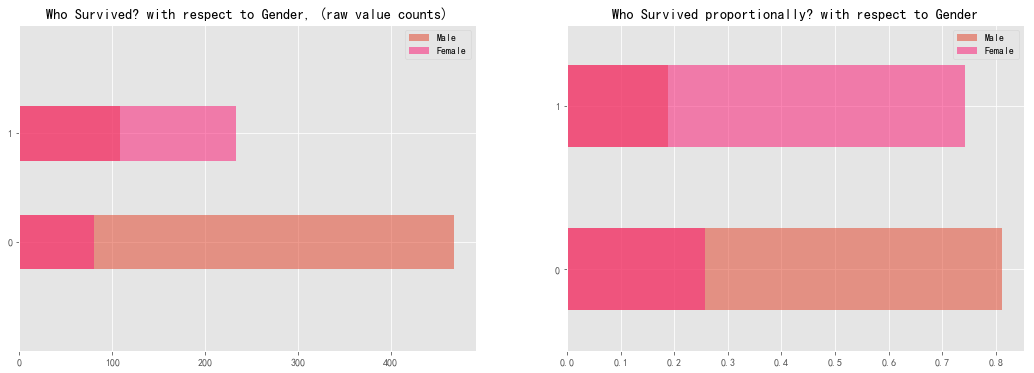

In [199]:
fig = plt.figure(figsize=(18, 6))

data_male = data.Survived[data.Sex == 'male'].value_counts().sort_index()
data_female = data.Survived[data.Sex == 'female'].value_counts().sort_index()
#生还人数
ax1 = fig.add_subplot(121)
data_male.plot(kind='barh', label='Male', alpha=0.55)
data_female.plot(kind='barh', color='#FA2379',label='Female', alpha=0.55)
plt.title("Who Survived? with respect to Gender, (raw value counts)")
plt.legend(loc='best')
ax1.set_ylim(-1, 2)

#生还比例
ax2 = fig.add_subplot(122)
(data_male/float(data_male.sum())).plot(kind='barh', label='Male', alpha=0.55)
(data_female/float(data_female.sum())).plot(kind='barh', color='#FA2379', label='Female', alpha=0.55)
plt.title("Who Survived proportionally? with respect to Gender")
plt.legend(loc='best')
ax1.set_ylim(-1, 2)

# 与社会地位有关吗？

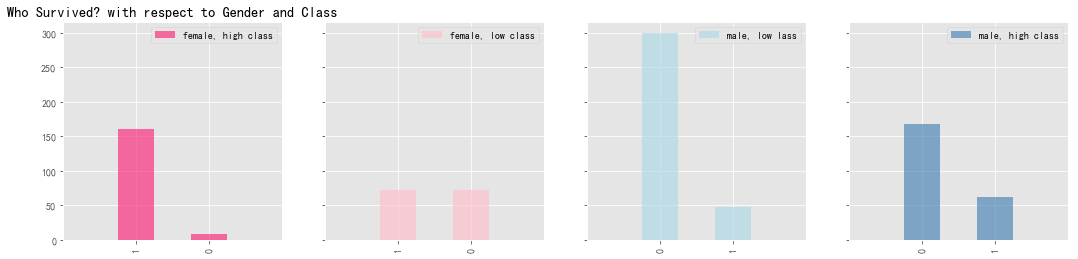

In [200]:
fig = plt.figure(figsize=(18, 4))
alpha_level = 0.65

#female hig class
ax1 = fig.add_subplot(141)
female_highclass = data.Survived[data.Sex == 'female'][data.Pclass != 3].value_counts()
female_highclass.plot(kind='bar', label='female, high class', color='#FA2479', alpha=alpha_level)
# ax1.set_xticklabels(["Survived", "Died"], rotation=0)
# ax1.set_xticklabels(['Died', "Survived"], rotation=0)
ax1.set_xlim(-1, len(female_highclass))
plt.title("Who Survived? with respect to Gender and Class");
plt.legend(loc='best')

#female low class
ax2 = fig.add_subplot(142, sharey=ax1)
female_lowclass = data.Survived[data.Sex == 'female'][data.Pclass == 3].value_counts()
female_lowclass.plot(kind='bar', label='female, low class', color='pink', alpha=alpha_level)
# ax2.set_xticklabels(["Survived", "Died"], rotation=0)
ax2.set_xlim(-1, len(female_lowclass))
# plt.title("Who Survived? with respect to Gender and Class");
plt.legend(loc='best')

#male low class
ax3 = fig.add_subplot(143, sharey=ax1)
male_lowclass = data.Survived[data.Sex == 'male'][data.Pclass == 3].value_counts()
male_lowclass.plot(kind='bar', label='male, low lass', color='lightblue', alpha=alpha_level)
# ax3.set_xticklabels(['Died', "Survived"], rotation=0)
ax3.set_xlim(-1, len(male_lowclass))
# plt.title("Who Survived? with respect to Gender and Class");
plt.legend(loc='best')

#male high class
ax4 = fig.add_subplot(144, sharey=ax1)
male_highclass = data.Survived[data.Sex == 'male'][data.Pclass != 3].value_counts()
male_highclass.plot(kind='bar', label='male, high class', color='steelblue', alpha=alpha_level)
# ax4.set_xticklabels(["Survived", "Died"], rotation=0)
ax4.set_xlim(-1, len(male_highclass))
# plt.title("Who Survived? with respect to Gender and Class");
plt.legend(loc='best')

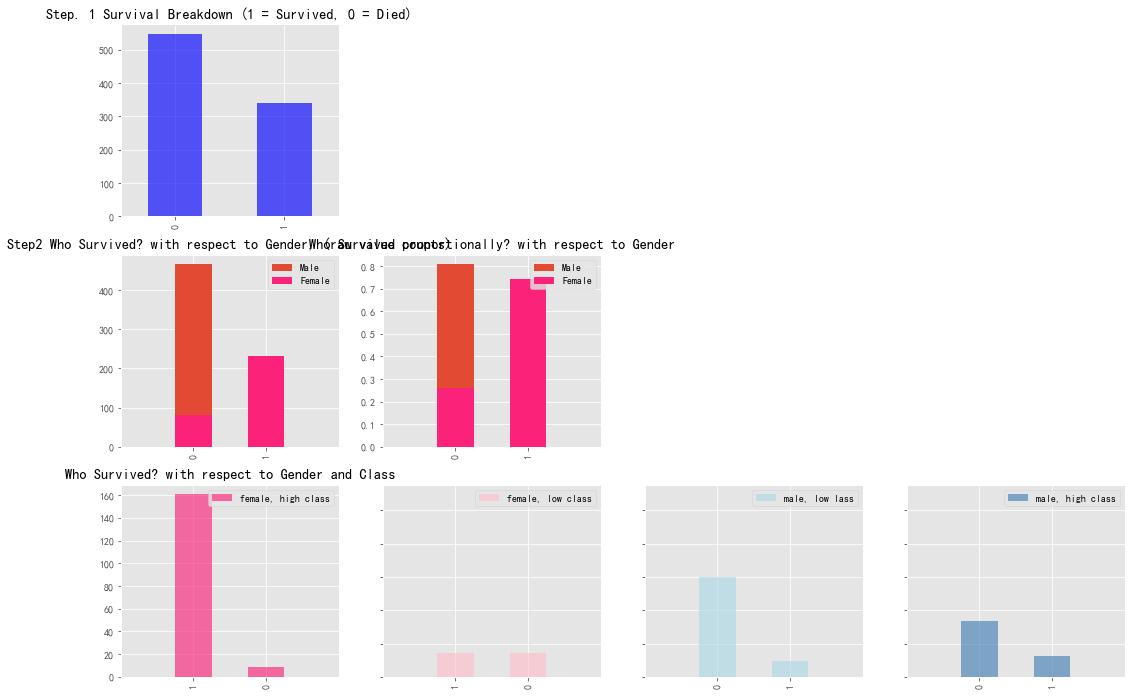

In [201]:
fig = plt.figure(figsize=(18, 12))
a = 0.65
#Step1 生还人数对比
ax1 = fig.add_subplot(341)
data.Survived.value_counts().plot(kind='bar', color='blue', alpha=a)
ax.set_xlim(-1, len(data.Survived.value_counts()))
plt.title("Step. 1 Survival Breakdown (1 = Survived, 0 = Died)")

#Step2 性别有关没有
ax2 = fig.add_subplot(345)
data_male = data.Survived[data.Sex == 'male'].value_counts().sort_index()
data_female = data.Survived[data.Sex == 'female'].value_counts().sort_index()
data_male.plot(kind='bar', label='Male')
data_female.plot(kind='bar', color='#FA2379',label='Female')
plt.title("Step2 Who Survived? with respect to Gender, (raw value counts)")
plt.legend(loc='best')
ax2.set_xlim(-1, 2)

#生还比例
ax3 = fig.add_subplot(346)
(data_male/float(data.Sex[data.Sex == 'male'].size)).plot(kind='bar', label='Male')
(data_female/float(data.Sex[data.Sex == 'female'].size)).plot(kind='bar', color='#FA2379', label='Female')
plt.title("Who Survived proportionally? with respect to Gender")
plt.legend(loc='best')
ax3.set_xlim(-1, 2)

#Step3 与 PClass 有关没有
ax4 = fig.add_subplot(349)
female_highclass = data.Survived[data.Sex == 'female'][data.Pclass != 3].value_counts()
female_highclass.plot(kind='bar', label='female, high class', color='#FA2479', alpha=alpha_level)
# ax1.set_xticklabels(["Survived", "Died"], rotation=0)
# ax1.set_xticklabels(['Died', "Survived"], rotation=0)
ax4.set_xlim(-1, len(female_highclass))
plt.title("Who Survived? with respect to Gender and Class");
plt.legend(loc='best')

#female low class 
ax5 = fig.add_subplot(3, 4, 10, sharey=ax1)
female_lowclass = data.Survived[data.Sex == 'female'][data.Pclass == 3].value_counts()
female_lowclass.plot(kind='bar', label='female, low class', color='pink', alpha=alpha_level)
# ax2.set_xticklabels(["Survived", "Died"], rotation=0)
ax5.set_xlim(-1, len(female_lowclass))
# plt.title("Who Survived? with respect to Gender and Class");
plt.legend(loc='best')

#male low class
ax6 = fig.add_subplot(3, 4, 11, sharey=ax1)
male_lowclass = data.Survived[data.Sex == 'male'][data.Pclass == 3].value_counts()
male_lowclass.plot(kind='bar', label='male, low lass', color='lightblue', alpha=alpha_level)
# ax3.set_xticklabels(['Died', "Survived"], rotation=0)
ax6.set_xlim(-1, len(male_lowclass))
# plt.title("Who Survived? with respect to Gender and Class");
plt.legend(loc='best')

#male high class
ax7 = fig.add_subplot(3, 4, 12, sharey=ax1)
male_highclass = data.Survived[data.Sex == 'male'][data.Pclass != 3].value_counts()
male_highclass.plot(kind='bar', label='male, high class', color='steelblue', alpha=alpha_level)
# ax4.set_xticklabels(["Survived", "Died"], rotation=0)
ax7.set_xlim(-1, len(male_highclass))
# plt.title("Who Survived? with respect to Gender and Class");
plt.legend(loc='best')

# 数据处理
    1.剔除passengerId, Ticket这个两个变量（不过先保留，用以预测错误的情况分析）
    2.将Embarked变量补全，然后对Survied,Name,Sex,Embared进行one-hot编码
    3.对Pclass,Fare,Sibsp和Parch进行归一化处理
    4.根据Name,Sex,SibSp,Parch预测age将其补全
    5.对age进行标准化处理
    6.将未编码的Survied剔除当做目标变量
    
    通常的处理工作
        
        1.缺失数据处理
        2.异常数据处理
        3.数据标准化
        4.数据特征变化
        5.新特征
        6.降维
        7...

## drop

In [7]:
data.drop(['Ticket'], axis=1, inplace=True)
#补全Embarked变量
data.loc[data.Embarked.isnull(), "Embarked"] = 'S'

## one-hot编码

In [8]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

le_sex = LabelEncoder().fit(data['Sex'])
# print(le_sex)
Sex_label = le_sex.transform(data['Sex'])
# print(Sex_label)
ohe_sex = OneHotEncoder(sparse=False).fit(Sex_label.reshape(-1, 1))
# print(ohe_sex)
Sex_ohe = ohe_sex.transform(Sex_label.reshape(-1, 1))
# print(Sex_ohe)

le_embarked = LabelEncoder().fit(data['Embarked'])
Embarked_label = le_embarked.transform(data['Embarked'])
ohe_embarked = OneHotEncoder(sparse=False).fit(Embarked_label.reshape(-1, 1))
Embarked_ohe = ohe_embarked.transform(Embarked_label.reshape(-1, 1))

In [9]:
Sex_label

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0,

In [10]:
Sex_ohe

array([[ 0.,  1.],
       [ 1.,  0.],
       [ 1.,  0.],
       ..., 
       [ 1.,  0.],
       [ 0.,  1.],
       [ 0.,  1.]])

In [11]:
#把name替换成Mrs,Mr,Miss
def replace_name(x):
    if 'Mrs' in x:
        return 'Mrs'
    elif 'Mr' in x:
        return 'Mr'
    else:
        return 'Miss'

data['Name'] = data['Name'].map(lambda x:replace_name(x))
le_name = LabelEncoder().fit(data['Name'])
Name_label = le_name.transform(data['Name'])
ohe_name = OneHotEncoder(sparse=False).fit(Name_label.reshape(-1, 1))
Name_ohe = ohe_name.transform(Name_label.reshape(-1, 1))

In [12]:
Name_ohe

array([[ 0.,  1.,  0.],
       [ 0.,  0.,  1.],
       [ 1.,  0.,  0.],
       ..., 
       [ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  1.,  0.]])

In [13]:
data['Sex_0'] = Sex_ohe[:, 0]
data['Sex_1'] = Sex_ohe[:, 1]
data['Embarked_0'] = Embarked_ohe[:, 0]
data['Embarked_1'] = Embarked_ohe[:, 1]
data['Embarked_2'] = Embarked_ohe[:, 2]
data['Name_0'] = Name_ohe[:, 0]
data['Name_1'] = Name_ohe[:, 1]
data['Name_2'] = Name_ohe[:, 2]

In [14]:
data['Pclass'] = data['Pclass'].astype(str)

In [15]:
ohe_pclass = OneHotEncoder(sparse=False).fit(data['Pclass'].values.reshape(-1, 1))
class_ohe = ohe_pclass.transform(data['Pclass'].values.reshape(-1, 1))
data['Pclass_0'] = class_ohe[:, 0]
data['Pclass_1'] = class_ohe[:, 1]
data['Pclass_2'] = class_ohe[:, 2]

In [16]:
class_ohe

array([[ 0.,  0.,  1.],
       [ 1.,  0.,  0.],
       [ 0.,  0.,  1.],
       ..., 
       [ 0.,  0.,  1.],
       [ 1.,  0.,  0.],
       [ 0.,  0.,  1.]])

## 数据标准化

In [17]:
data['Fare']

0        7.2500
1       71.2833
2        7.9250
3       53.1000
4        8.0500
5        8.4583
6       51.8625
7       21.0750
8       11.1333
9       30.0708
10      16.7000
11      26.5500
12       8.0500
13      31.2750
14       7.8542
15      16.0000
16      29.1250
17      13.0000
18      18.0000
19       7.2250
20      26.0000
21      13.0000
22       8.0292
23      35.5000
24      21.0750
25      31.3875
26       7.2250
27     263.0000
28       7.8792
29       7.8958
         ...   
861     11.5000
862     25.9292
863     69.5500
864     13.0000
865     13.0000
866     13.8583
867     50.4958
868      9.5000
869     11.1333
870      7.8958
871     52.5542
872      5.0000
873      9.0000
874     24.0000
875      7.2250
876      9.8458
877      7.8958
878      7.8958
879     83.1583
880     26.0000
881      7.8958
882     10.5167
883     10.5000
884      7.0500
885     29.1250
886     13.0000
887     30.0000
888     23.4500
889     30.0000
890      7.7500
Name: Fare, Length: 891,

In [18]:
from sklearn.preprocessing import StandardScaler
data['Fare_scaled'] = StandardScaler().fit_transform(data['Fare'].values.reshape(-1, 1))
data['SibSp_scaled'] = StandardScaler().fit_transform(data['SibSp'].values.reshape(-1, 1))
data['Parch_scaled'] = StandardScaler().fit_transform(data['Parch'].values.reshape(-1, 1))

D:\pr1\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [19]:
data['Fare_scaled']

0     -0.502445
1      0.786845
2     -0.488854
3      0.420730
4     -0.486337
5     -0.478116
6      0.395814
7     -0.224083
8     -0.424256
9     -0.042956
10    -0.312172
11    -0.113846
12    -0.486337
13    -0.018709
14    -0.490280
15    -0.326267
16    -0.061999
17    -0.386671
18    -0.285997
19    -0.502949
20    -0.124920
21    -0.386671
22    -0.486756
23     0.066360
24    -0.224083
25    -0.016444
26    -0.502949
27     4.647001
28    -0.489776
29    -0.489442
         ...   
861   -0.416873
862   -0.126345
863    0.751946
864   -0.386671
865   -0.386671
866   -0.369389
867    0.368295
868   -0.457142
869   -0.424256
870   -0.489442
871    0.409741
872   -0.547748
873   -0.467209
874   -0.165189
875   -0.502949
876   -0.450180
877   -0.489442
878   -0.489442
879    1.025945
880   -0.124920
881   -0.489442
882   -0.436671
883   -0.437007
884   -0.506472
885   -0.061999
886   -0.386671
887   -0.044381
888   -0.176263
889   -0.044381
890   -0.492378
Name: Fare_scaled, Lengt

## 数据补全

In [20]:
#预测年龄并补全
from sklearn.ensemble import RandomForestRegressor

def set_missing_age(data):
    train = data[['Age', "SibSp_scaled", 'Parch_scaled', 'Name_0', "Name_2", 'Sex_0', 'Sex_1', 'Pclass_0', 'Pclass_1', 'Pclass_2']]
    known_age = train[train.Age.notnull()].as_matrix()
    unknown_age = train[train.Age.isnull()].as_matrix()
    y = known_age[:, 0]
    x = known_age[:, 1:]
    rf = RandomForestRegressor(random_state=0, n_estimators=200, n_jobs=-1)
    rf.fit(x, y)
    print(rf.score(x, y))
    predictage = rf.predict(unknown_age[:, 1:])
    data.loc[data.Age.isnull(), 'Age'] = predictage
    return data, rf

data, rf = set_missing_age(data)
data['Age_scaled'] =StandardScaler().fit_transform(data['Age'].values.reshape(-1, 1))

0.525928011766


In [21]:
train_x = data[['Sex_0', 'Sex_1', 'Embarked_0', 'Embarked_1', 'Embarked_2', 'Name_0', "Name_2", 'Pclass_0', 'Pclass_1', 'Pclass_2', 'Age_scaled',
              'Fare_scaled', 'SibSp_scaled', 'Parch_scaled', 'PassengerId']].as_matrix()
train_y = data['Survived'].as_matrix()

## modeling

In [22]:
train_x[:, :-1].shape

(891, 14)

In [23]:
#模型构造
from sklearn.model_selection import  train_test_split
from sklearn.linear_model import LogisticRegression

x_tr_i, x_te_i, y_tr, y_te = train_test_split(train_x, train_y, test_size=0.3, random_state=0)
x_tr = x_tr_i[:, :-1]
x_te = x_te_i[:, :-1]

lr = LogisticRegression(C=1.0, tol=1e-6)
lr.fit(x_tr, y_tr)
print(lr.score(x_te, y_te))

from sklearn.svm import SVC
svc = SVC(C=2, kernel='rbf', decision_function_shape='ovo')
svc.fit(x_tr, y_tr)
print(svc.score(x_te, y_te))

from sklearn.ensemble import RandomForestClassifier
randomf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0)
randomf.fit(x_tr, y_tr)
print(randomf.score(x_te, y_te))

from sklearn.ensemble import GradientBoostingClassifier
gdbt = GradientBoostingClassifier(n_estimators=600, max_depth=5, random_state=6)
gdbt.fit(x_tr, y_tr)
print(gdbt.score(x_te, y_te))

0.805970149254
0.820895522388
0.832089552239
0.80223880597


## 优化

In [24]:
import numpy as np

from time import time
from scipy.stats import randint as sp_randint

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

### grid search

In [25]:
#Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print('Model with rank: {0}'.format(i))
            print("Mean validation score: {0:.3f}(std:{1:.3f})".format(
                results['mean_test_score'][candidate],
                results['std_test_score'][candidate]))
            print("Parameters:{0}".format(results['params'][candidate]))
            print("")

In [26]:
sqrtfeat = int(np.sqrt(x_tr.shape[1]))

#Simple grid test
grid_test = {"n_estimators":[100, 200, 500],
            "criterion"    :['gini', 'entropy'],
            "max_features" :[sqrtfeat - 1, sqrtfeat, sqrtfeat + 1],
            "max_depth"    :[5, 10, 25],
            "min_samples_split":[2, 5, 10]}

forest = RandomForestClassifier(oob_score=True)

print("Hyperparameter optimization using GridSearchCV...")

grid_search = GridSearchCV(forest, grid_test, n_jobs=-1, cv=3)
start = time()
grid_search.fit(x_tr, y_tr)
print("GridSearchCV took %.2f seconds for %d candidate parameter settings."%(time() - start, len(grid_search.cv_results_['params'])))

Hyperparameter optimization using GridSearchCV...
GridSearchCV took 85.80 seconds for 162 candidate parameter settings.


In [27]:
report(grid_search.cv_results_)

Model with rank: 1
Mean validation score: 0.823(std:0.021)
Parameters:{'criterion': 'gini', 'max_depth': 10, 'max_features': 4, 'min_samples_split': 5, 'n_estimators': 100}

Model with rank: 1
Mean validation score: 0.823(std:0.015)
Parameters:{'criterion': 'entropy', 'max_depth': 10, 'max_features': 4, 'min_samples_split': 10, 'n_estimators': 100}

Model with rank: 3
Mean validation score: 0.822(std:0.014)
Parameters:{'criterion': 'gini', 'max_depth': 5, 'max_features': 4, 'min_samples_split': 2, 'n_estimators': 200}

Model with rank: 3
Mean validation score: 0.822(std:0.017)
Parameters:{'criterion': 'gini', 'max_depth': 10, 'max_features': 4, 'min_samples_split': 10, 'n_estimators': 200}

Model with rank: 3
Mean validation score: 0.822(std:0.014)
Parameters:{'criterion': 'entropy', 'max_depth': 5, 'max_features': 4, 'min_samples_split': 5, 'n_estimators': 200}

Model with rank: 3
Mean validation score: 0.822(std:0.017)
Parameters:{'criterion': 'entropy', 'max_depth': 25, 'max_feature

In [28]:
print(grid_search.score(x_te, y_te))

0.828358208955


In [166]:
random_test1 = {"n_estimators":[100, 200, 500],
                "criterion"    :['gini', 'entropy'],
                "max_features" :np.rint(np.linspace(sqrtfeat/2, sqrtfeat*2, 5)).astype(int),
                "max_depth"    :np.rint(np.linspace(1, x_tr.shape[1]/2, 10)),
                "min_samples_split":np.rint(np.linspace(2, x_tr.shape[0]/50, 10)).astype(int)}

n_iter_search = 20
random_search = RandomizedSearchCV(forest, param_distributions=random_test1, n_iter=n_iter_search)

start = time()
random_search.fit(x_tr,y_tr)
print("RandomSearchCV took %.2f seconds for %d candidate parameter settings."%(time() - start, n_iter_search))
report(random_search.cv_results_)

RandomSearchCV took 23.12 seconds for 20 candidate parameter settings.
Model with rank: 1
Mean validation score: 0.825(std:0.013)
Parameters:{'n_estimators': 200, 'min_samples_split': 4, 'max_features': 5, 'max_depth': 6.0, 'criterion': 'entropy'}

Model with rank: 1
Mean validation score: 0.825(std:0.010)
Parameters:{'n_estimators': 500, 'min_samples_split': 7, 'max_features': 6, 'max_depth': 5.0, 'criterion': 'entropy'}

Model with rank: 1
Mean validation score: 0.825(std:0.009)
Parameters:{'n_estimators': 500, 'min_samples_split': 7, 'max_features': 5, 'max_depth': 6.0, 'criterion': 'entropy'}



In [167]:
print(random_search.score(x_te, y_te))

0.820895522388


In [168]:
from sklearn.metrics import classification_report
print(classification_report(y_te, grid_search.predict(x_te)))

             precision    recall  f1-score   support

          0       0.85      0.88      0.87       168
          1       0.79      0.74      0.76       100

avg / total       0.83      0.83      0.83       268



In [169]:
print(classification_report(y_te, random_search.predict(x_te)))

             precision    recall  f1-score   support

          0       0.84      0.88      0.86       168
          1       0.78      0.72      0.75       100

avg / total       0.82      0.82      0.82       268



## learning curve

In [29]:
from sklearn.model_selection import learning_curve

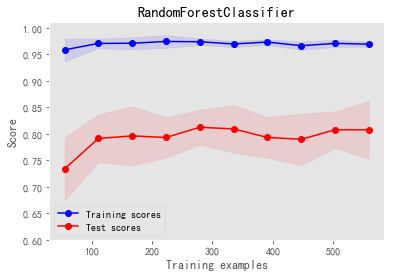

In [30]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

#assume classifier and training data is prepared...

train_sizes, train_scores, test_scores = learning_curve(
    forest, x_tr, y_tr, cv=10, n_jobs=-1, train_sizes=np.linspace(.1, 1., 10), verbose=0)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.title("RandomForestClassifier")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.ylim(0.6, 1.01)
plt.grid()
plt.gca().invert_yaxis()

#Plot the average training and test score lines at each training set size
plt.plot(train_sizes, train_scores_mean, 'o-', color='b', label="Training scores")
plt.plot(train_sizes, test_scores_mean, 'o-', color='r', label="Test scores")
plt.legend(loc='best')

#plot the std deviation as a transparent range at each training set size
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='b')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='r')

plt.gca().invert_yaxis()

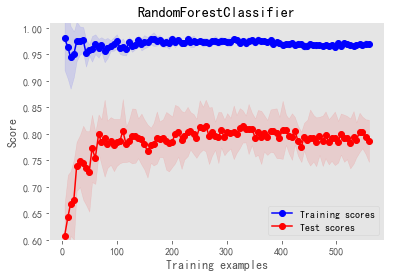

In [31]:
train_sizes, train_scores, test_scores = learning_curve(
    forest, x_tr, y_tr, cv=10, n_jobs=-1, train_sizes=np.linspace(.01, 1., 100), verbose=0)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.title("RandomForestClassifier")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.ylim(0.6, 1.01)
plt.grid()
plt.gca().invert_yaxis()

#Plot the average training and test score lines at each training set size
plt.plot(train_sizes, train_scores_mean, 'o-', color='b', label="Training scores")
plt.plot(train_sizes, test_scores_mean, 'o-', color='r', label="Test scores")
plt.legend(loc='best')

#plot the std deviation as a transparent range at each training set size
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='b')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='r')

plt.gca().invert_yaxis()

## roc

ROC AUC:0.85


D:\pr1\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\pr1\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


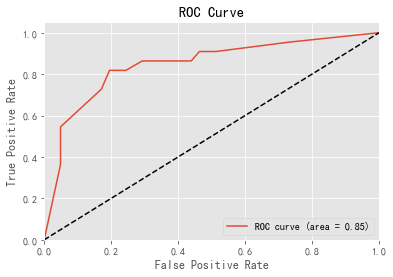

In [32]:
from sklearn.metrics import roc_curve, auc

#shuffle and split training and sets
X_train, X_test, y_train, y_test = train_test_split(x_tr, y_tr, test_size=.1)
forest.fit(X_train, y_train)

#Determine the false positive and true positive rates
fpr, tpr, _ = roc_curve(y_test, forest.predict_proba(X_test)[:, 1])

#Calculate hte AUC
roc_auc = auc(fpr, tpr)
print("ROC AUC:%0.2f" % roc_auc)

#plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label="ROC curve (area = %0.2f)" % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")

## stacking

In [33]:
from sklearn.ensemble import VotingClassifier

model = VotingClassifier(estimators=[('lr', lr), ('svc', svc), ('rf', randomf), ('GDBT', gdbt)], voting='hard', weights=[0.5, 1.5, 0.6, 0.6])
model.fit(x_tr, y_tr)
print(model.score(x_te, y_te))

0.824626865672


# 预测

In [34]:
#预测数据
data_test = pd.read_csv('../../data/titanic/test.csv')

data_test.drop(['Ticket'], axis=1, inplace=True)
#补全Embarked变量
data_test.loc[data_test.Embarked.isnull(), "Embarked"] = 'S'

le_sex = LabelEncoder().fit(data_test['Sex'])
Sex_label = le_sex.transform(data_test['Sex'])
ohe_sex = OneHotEncoder(sparse=False).fit(Sex_label.reshape(-1, 1))
Sex_ohe = ohe_sex.transform(Sex_label.reshape(-1, 1))

le_embarked = LabelEncoder().fit(data_test['Embarked'])
Embarked_label = le_embarked.transform(data_test['Embarked'])
ohe_embarked = OneHotEncoder(sparse=False).fit(Embarked_label.reshape(-1, 1))
Embarked_ohe = ohe_embarked.transform(Embarked_label.reshape(-1, 1))

data_test['Name'] = data_test['Name'].map(lambda x:replace_name(x))
le_name = LabelEncoder().fit(data_test['Name'])
Name_label = le_name.transform(data_test['Name'])
ohe_name = OneHotEncoder(sparse=False).fit(Name_label.reshape(-1, 1))
Name_ohe = ohe_name.transform(Name_label.reshape(-1, 1))

data_test['Sex_0'] = Sex_ohe[:, 0]
data_test['Sex_1'] = Sex_ohe[:, 1]
data_test['Embarked_0'] = Embarked_ohe[:, 0]
data_test['Embarked_1'] = Embarked_ohe[:, 1]
data_test['Embarked_2'] = Embarked_ohe[:, 2]
data_test['Name_0'] = Name_ohe[:, 0]
data_test['Name_1'] = Name_ohe[:, 1]
data_test['Name_2'] = Name_ohe[:, 2]

# data['Pclass'] = data['Pclass'].astype(str)

ohe_pclass = OneHotEncoder(sparse=False).fit(data_test['Pclass'].values.reshape(-1, 1))
class_ohe = ohe_pclass.transform(data_test['Pclass'].values.reshape(-1, 1))
data_test['Pclass_0'] = class_ohe[:, 0]
data_test['Pclass_1'] = class_ohe[:, 1]
data_test['Pclass_2'] = class_ohe[:, 2]
data_test.loc[data_test.Fare.isnull(), 'Fare'] = 0
data_test['Fare_scaled'] = StandardScaler().fit_transform(data_test['Fare'].values.reshape(-1, 1))
data_test['SibSp_scaled'] = StandardScaler().fit_transform(data_test['SibSp'].values.reshape(-1, 1))
data_test['Parch_scaled'] = StandardScaler().fit_transform(data_test['Parch'].values.reshape(-1, 1))

train_test = data_test[['Age', 'SibSp_scaled', 'Parch_scaled', 'Name_0', 'Name_2', 'Sex_0', 'Sex_1', 'Pclass_0', 'Pclass_1', 'Pclass_2']]
unknown_age_test = train_test[train_test.Age.isnull()].as_matrix()
x_test = unknown_age_test[:, 1:]
predictage = rf.predict(x_test)
data_test.loc[data_test.Age.isnull(), 'Age'] = predictage
data_test['Age_scaled'] = StandardScaler().fit_transform(data_test['Age'].reshape(-1, 1))
test_x = data_test[['Sex_0', 'Sex_1', 'Embarked_0', 'Embarked_1', 'Embarked_2', 'Name_0', "Name_2", 'Pclass_0', 'Pclass_1', 'Pclass_2', 'Age_scaled',
              'Fare_scaled', 'SibSp_scaled', 'Parch_scaled']].as_matrix()
predictions = grid_search.predict(test_x).astype(np.int32)
result = pd.DataFrame({'PassengerId':data_test['PassengerId'].as_matrix(), 'Survived':predictions})
result.to_csv('result.csv', index=False)

D:\pr1\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\pr1\Anaconda3\lib\site-packages\ipykernel_launcher.py:50: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


In [271]:
data_test['PassengerId']

0       892
1       893
2       894
3       895
4       896
5       897
6       898
7       899
8       900
9       901
10      902
11      903
12      904
13      905
14      906
15      907
16      908
17      909
18      910
19      911
20      912
21      913
22      914
23      915
24      916
25      917
26      918
27      919
28      920
29      921
       ... 
388    1280
389    1281
390    1282
391    1283
392    1284
393    1285
394    1286
395    1287
396    1288
397    1289
398    1290
399    1291
400    1292
401    1293
402    1294
403    1295
404    1296
405    1297
406    1298
407    1299
408    1300
409    1301
410    1302
411    1303
412    1304
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

# 意料之外

In [35]:
mask = grid_search.predict(train_x[:, :-1]) != train_y

In [36]:
o_data = pd.read_csv("../../data/titanic/train.csv")

In [37]:
o_data[mask].shape

(100, 12)

In [38]:
wrong = o_data[mask]

In [39]:
wrong_p1 = wrong[wrong['Pclass'] == 1]

In [40]:
wrong_p1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
30,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,NaN,C
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,NaN,C
55,56,1,1,"Woolner, Mr. Hugh",male,NaN,0,0,19947,35.5000,C52,S
97,98,1,1,"Greenfield, Mr. William Bertram",male,23.0,0,1,PC 17759,63.3583,D10 D12,C
177,178,0,1,"Isham, Miss. Ann Elizabeth",female,50.0,0,0,PC 17595,28.7125,C49,C
224,225,1,1,"Hoyt, Mr. Frederick Maxfield",male,38.0,1,0,19943,90.0000,C93,S
298,299,1,1,"Saalfeld, Mr. Adolphe",male,NaN,0,0,19988,30.5000,C106,S
390,391,1,1,"Carter, Mr. William Ernest",male,36.0,1,2,113760,120.0000,B96 B98,S
498,499,0,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1,2,113781,151.5500,C22 C26,S
505,506,0,1,"Penasco y Castellana, Mr. Victor de Satode",male,18.0,1,0,PC 17758,108.9000,C65,C


In [41]:
wrong_p1[wrong_p1['Sex'] == 'female']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
177,178,0,1,"Isham, Miss. Ann Elizabeth",female,50.0,0,0,PC 17595,28.7125,C49,C
498,499,0,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1,2,113781,151.5500,C22 C26,S


In [42]:
np.zeros((10, 2)).T.view().reshape(-1)

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [46]:
data_test = pd.read_csv('../../data/titanic/test.csv')

# data_test.drop(['Ticket'], axis=1, inplace=True)
#补全Embarked变量
# data_test.loc[data_test.Embarked.isnull(), "Embarked"] = 'S'

le_sex = LabelEncoder().fit(data_test['Sex'])
Sex_label = le_sex.transform(data_test['Sex'])

# ohe_sex = OneHotEncoder(sparse=False).fit(Sex_label.reshape(-1, 1))
le_embarked = LabelEncoder().fit(data_test['Embarked'])
Embarked_label = le_embarked.transform(data_test['Embarked'])
ohe_embarked = OneHotEncoder(sparse=False).fit(Embarked_label.reshape(-1, 1))
Embarked_ohe = ohe_embarked.transform(Embarked_label.reshape(-1, 1))

In [44]:
Embarked_ohe

array([[ 0.,  1.,  0.],
       [ 0.,  0.,  1.],
       [ 0.,  1.,  0.],
       ..., 
       [ 0.,  0.,  1.],
       [ 0.,  0.,  1.],
       [ 1.,  0.,  0.]])

In [45]:
data_test['Pclass']

0      3
1      3
2      2
3      3
4      3
5      3
6      3
7      2
8      3
9      3
10     3
11     1
12     1
13     2
14     1
15     2
16     2
17     3
18     3
19     3
20     1
21     3
22     1
23     1
24     1
25     3
26     1
27     3
28     1
29     3
      ..
388    3
389    3
390    1
391    1
392    3
393    2
394    3
395    1
396    3
397    1
398    3
399    3
400    1
401    2
402    1
403    1
404    1
405    2
406    2
407    1
408    3
409    3
410    3
411    1
412    3
413    3
414    1
415    3
416    3
417    3
Name: Pclass, Length: 418, dtype: int64

In [263]:
data_test['Pclass'].values

array([3, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 1, 1, 2, 1, 2, 2, 3, 3, 3, 1, 3, 1,
       1, 1, 3, 1, 3, 1, 3, 2, 2, 3, 3, 1, 3, 3, 3, 3, 3, 3, 1, 3, 2, 1, 3,
       1, 3, 1, 3, 1, 2, 2, 1, 2, 3, 3, 3, 3, 1, 3, 2, 3, 3, 1, 2, 3, 1, 1,
       1, 3, 3, 3, 1, 1, 1, 3, 1, 2, 3, 3, 1, 1, 3, 2, 3, 3, 3, 3, 2, 3, 3,
       1, 3, 1, 3, 1, 3, 3, 3, 1, 2, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 1, 3, 1,
       3, 3, 3, 1, 2, 2, 3, 1, 3, 3, 3, 3, 3, 2, 3, 3, 1, 3, 3, 3, 3, 3, 2,
       3, 3, 3, 1, 1, 2, 1, 3, 1, 3, 1, 2, 1, 3, 3, 3, 3, 3, 1, 3, 1, 3, 3,
       3, 2, 3, 2, 3, 1, 3, 1, 3, 3, 3, 3, 3, 3, 2, 2, 1, 2, 1, 2, 1, 1, 3,
       1, 2, 2, 3, 3, 2, 2, 1, 3, 2, 2, 3, 1, 3, 2, 3, 3, 3, 1, 2, 2, 1, 3,
       2, 1, 3, 3, 3, 2, 2, 3, 1, 3, 1, 1, 3, 2, 3, 2, 3, 1, 3, 3, 3, 3, 2,
       2, 1, 3, 3, 1, 3, 1, 3, 2, 1, 1, 2, 1, 3, 3, 1, 2, 2, 2, 3, 2, 3, 1,
       3, 3, 3, 3, 3, 2, 3, 3, 3, 2, 3, 2, 3, 1, 3, 3, 3, 1, 3, 1, 3, 3, 2,
       2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 1, 3, 3, 1, 3, 3, 2, 3, 1,
       3, 3,